In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset to a Pandas DataFrame
health_dataset = pd.read_csv('/content/Maternal Health Risk Data Set.csv')

In [3]:
# number of rows & columns in the dataset
health_dataset.shape

(1014, 7)

In [4]:
# first 5 rows of the dataset
health_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
# checking for missing values
health_dataset.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [6]:
# statistical measures of the dataset
health_dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


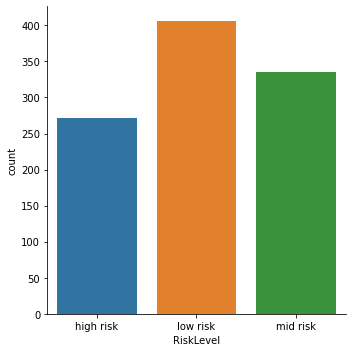

In [7]:
# number of values for each RiskLevel
sns.catplot(x='RiskLevel', data = health_dataset, kind = 'count')

<AxesSubplot:xlabel='RiskLevel', ylabel='SystolicBP'>

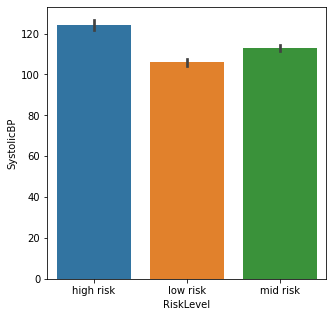

In [8]:
# SystolicBP vs Risklevel
plot = plt.figure(figsize=(5,5))
sns.barplot(x='RiskLevel', y = 'SystolicBP', data = health_dataset)

<AxesSubplot:xlabel='RiskLevel', ylabel='DiastolicBP'>

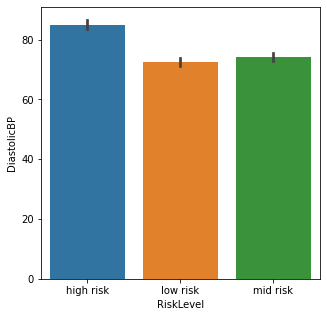

In [9]:
# DiastolicBP vs RiskLevel
plot = plt.figure(figsize=(5,5))
sns.barplot(x='RiskLevel', y = 'DiastolicBP', data = health_dataset)

<AxesSubplot:xlabel='RiskLevel', ylabel='HeartRate'>

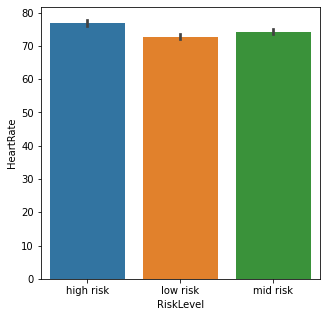

In [10]:
# HeartRate vs RiskLevel
plot = plt.figure(figsize=(5,5))
sns.barplot(x='RiskLevel', y = 'HeartRate', data = health_dataset)

<AxesSubplot:xlabel='RiskLevel', ylabel='Age'>

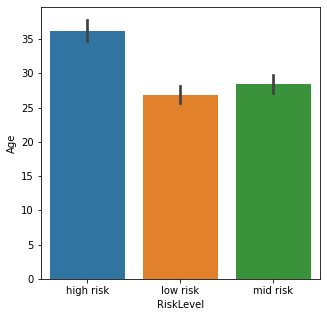

In [11]:
# Age vs RiskLevel
plot = plt.figure(figsize=(5,5))
sns.barplot(x='RiskLevel', y = 'Age', data = health_dataset)

In [12]:
correlation = health_dataset.corr()

<AxesSubplot:>

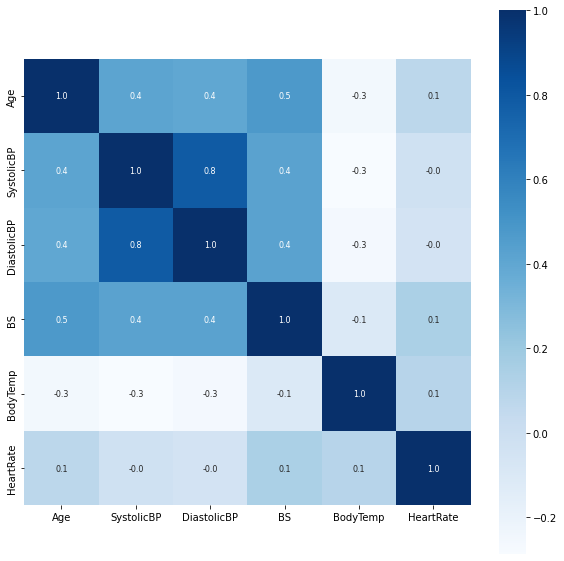

In [13]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [14]:
# separate the data and Label
X = health_dataset.drop('RiskLevel',axis=1)

In [15]:
print(X)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]


In [16]:
Y = health_dataset['RiskLevel']

In [17]:
print(Y)

0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [19]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1014,) (811,) (203,)


In [20]:
model = RandomForestClassifier()

In [21]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [22]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [23]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.8669950738916257


In [24]:
input_data = (32,120,90,6.9,98,70)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

['mid risk']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
